In [16]:
from networkx.algorithms import bipartite
import csv
import networkx as nx

In [2]:
movies = []
with open('SENA_DataSet - MCUActorList.csv',encoding="utf8") as f:
    file = csv.reader(f)
    for line in file:
        movies.append(line[0])
movies

['Iron Man',
 'The incredible Hulk',
 'Iron Man 2',
 'Thor',
 'Captain America: The first Avenger',
 "Marvel's the Avengers",
 'Iron Man 3',
 'Thor: The dark world',
 'Captain America : The Winter Soldier',
 'Guardians Of the Galaxy',
 'Avengers : Age of Ultron',
 'Ant-Man',
 'Captain America: Civil War',
 'Doctor Strange',
 'Guardians of the Galaxy Vol. 2',
 'Spider-Man:Homecoming',
 'Thor:Ragnarok',
 'Black Panther',
 'Avengers: Infinity War',
 'Ant-Man and the Wasp',
 'Captain-Marvel',
 'Avengers:Endgame',
 'Spider-Man:Far From Home',
 'Black Widow',
 'Shang-Chi and the Legend of the Ten Rings',
 'Eternals',
 'Spider-Man: No Way Home',
 'Doctor Strange in the Multiverse of Madness',
 'Thor: Love and Thunder',
 'Werewolf by Night',
 "Marvels' Agents of S.H.I.E.L.D.",
 "Marvel's Agent Carter",
 "Marvels's Daredevil",
 'Marvel - Jessica Jones',
 "Marvel's Luke Cage",
 "Marvel's Iron Fist",
 'Marvel - The Defenders',
 'Inhumans',
 "Marvel's The Punisher",
 "Marvel's Runaways",
 'Cloak &

In [3]:
actors = set()
with open('SENA_DataSet - MCUActorList.csv', encoding="utf8") as f:
    file = csv.reader(f)
    for line in file:
        for actor in line[1:]:
            if actor != '':
                actors.add(actor)
actors

{'Adam Beach',
 'Alaqua Cox ',
 'Alexandra Shipp',
 'Alfre Woodard',
 'Alice Braga',
 'Allegra Acosta',
 'Amber Rose Revah',
 'Andrea Roth',
 'Andrew Garfield',
 'Angelina Jolie',
 'Anna Paquin',
 'Anson Mount',
 'Anthony Hopkins',
 'Anthony Mackie',
 'Anya Taylor-Joy',
 'Ariela Barer',
 'Aubrey Joseph',
 'Awkwafina',
 'Barry Keoghan',
 'Ben Barnes',
 'Ben Kingsley',
 'Ben Mendelsohn',
 'Benedict Cumberbatch',
 'Benedict Wong',
 'Blu Hunt',
 'Boyd Holbrook',
 'Brad Pitt',
 'Bradely Cooper',
 'Bradley Cooper',
 'Brett Dalton',
 'Brianna Hildebrand',
 'Bridget Regan',
 'Brie Larson',
 'Bruce Davison',
 'Cate Blanchett',
 'Chad Michel Murray',
 'Chadwick Boseman',
 'Charlie Cox',
 'Charlie Heaton',
 'Chiswetel Ejiofor',
 'Chloe Bennet',
 'Chris Evans',
 'Chris Hemsworth',
 'Chris Patt',
 'Christian Bale',
 'Clark Gregg',
 'Colby Minifie',
 'Corey Stall',
 'Dafne Keen',
 'Danial Bruhl',
 'Danniel Bruhl',
 'Danny Huston',
 'Dave Bautista',
 'David Harbour',
 'David Tennant',
 'David Wenham'

In [22]:
ratings = {}
with open('SENA_DataSet - MCUCriticRatingList.csv', encoding="utf8") as f:
    file = csv.reader(f)
    for line in file:
        if line[-1] != '':
            ratings[line[0]] = int(line[-1])
print('Normalized ratings : ',ratings)

Normalized ratings :  {'Iron Man': 58, 'The incredible Hulk': 43, 'Iron Man 2': 43, 'Thor': 45, 'Captain America: The first Avenger': 48, "Marvel's the Avengers": 53, 'Iron Man 3': 71, 'Thor: The dark world': 60, 'Captain America : The Winter Soldier': 80, 'Guardians Of the Galaxy': 84, 'Avengers : Age of Ultron': 71, 'Ant-Man': 74, 'Captain America: Civil War': 83, 'Doctor Strange': 81, 'Guardians of the Galaxy Vol. 2': 76, 'Spider-Man:Homecoming': 83, 'Thor:Ragnarok': 84, 'Black Panther': 92, 'Avengers: Infinity War': 77, 'Ant-Man and the Wasp': 79, 'Captain-Marvel': 72, 'Avengers:Endgame': 86, 'Spider-Man:Far From Home': 80, 'Black Widow': 73, 'Shang-Chi and the Legend of the Ten Rings': 81, 'Eternals': 50, 'Spider-Man: No Way Home': 82, 'Doctor Strange in the Multiverse of Madness': 67, 'Thor: Love and Thunder': 61, 'Werewolf by Night': 77, "Marvels' Agents of S.H.I.E.L.D.": 85, "Marvel's Agent Carter": 79, "Marvels's Daredevil": 84, 'Marvel - Jessica Jones': 82, "Marvel's Luke Cag

In [4]:
G = nx.Graph()

In [42]:
G.add_nodes_from(actors,bipartite='Actors')
G.add_nodes_from([(m,{'rating':ratings[m]}) for m in movies],bipartite='Movies')

In [44]:
with open('SENA_DataSet - MCUActorList.csv', encoding = "utf8") as f:
    file = csv.reader(f)
    for line in file:
        movie = line[0]
        for i in line[1:]:
            if i != '':
                G.add_edge(movie,i)

In [45]:
actor_nodes = [n for n,d in G.nodes(data=True) if d['bipartite'] == 'Actors']
movie_nodes = [n for n,d in G.nodes(data=True) if d['bipartite'] == 'Movies']
print('Actors : ',actor_nodes,end='\n\n')
print('Movies and Series : ',movie_nodes,end='\n\n')
print('Is Bipartite : ',bipartite.is_bipartite(G),end='\n\n')
print(f'Number of Actors : {len(actor_nodes)}\n\nNumber of Movies and Series : {len(movie_nodes)}')

Actors :  ['Simu Liu', 'Elisabeth Olsen', 'Shawn Ashmore', 'Tim Roth', 'Emily VanCamp', 'Chloe Bennet', 'Ben Kingsley', 'Elizabeth Henstridge', 'Richard Madden', 'Natalie Portman', 'Gael García Bernal', 'Rachel Weisz', 'MIchel B. Jordan', 'Finn Jones', 'Mahershala Ali', 'Chiswetel Ejiofor', 'Edward Norton', 'Colby Minifie', 'Danial Bruhl', 'Vin Diesel', 'Tatiana Maslany', 'Jake Gyllenhaal', 'Zoe Saldana', 'Randall Park', 'Morena Baccarin', 'Samuel L. Jackson', 'Kat Dennings', 'Sophie Turner', 'Alexandra Shipp', 'Hugo Weaving', 'Zazie Beetz', 'Kathryn Hahn', 'Danny Huston', 'Laura Donnelly', 'Rebecca Romijn', 'Liv Tyler', 'Blu Hunt', 'Sophia Di Martino', 'Brianna Hildebrand', 'Brad Pitt', 'T.J. Miller', 'Letitia Wright', 'Rachel Taylor', 'Gloria Reuben', 'Lucas Till', 'Iwan Rheon', 'Idris Elba', 'Alaqua Cox ', 'Hailee Steinfeld', 'Clark Gregg', 'Tao Okamoto', 'Virginia Gardner', 'Laurence Fishburne', 'Danniel Bruhl', 'Rossario Dawson', 'Erin Moriarty', 'Vera Farmiga', 'Gina Carano', 'Mi

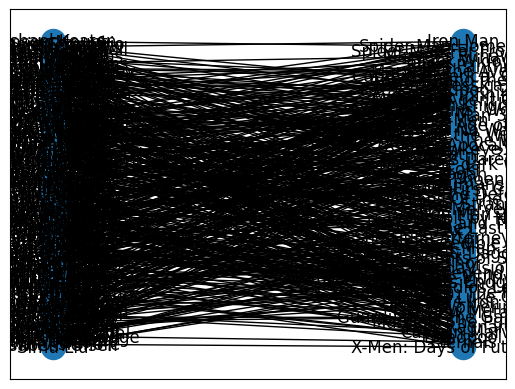

In [46]:
nx.draw_networkx(G,pos=nx.drawing.bipartite_layout(G,actors),width=1)

In [47]:
nx.write_gexf(G,'MCU_actors_movies_bipartite.gexf')

In [51]:
potential_actors = {}
for n , d in G.nodes(data=True):
    if d['bipartite'] == 'Actors' and G.degree[n] <= 2:
        rating = 0
        for neighbour in G.neighbors(n):
            rating += G.nodes[neighbour]['rating']
        rating /= G.degree[n]
        potential_actors[n] = rating
potential_actors = sorted(list(potential_actors.items()),key=lambda x : x[1],reverse=True)
potential_actors

[('Letitia Wright', 92.0),
 ('Martin Freeman', 92.0),
 ('Michael B. Jordan', 92.0),
 ("Lupita Nyong'o", 92.0),
 ('Mehwish Hayat', 88.0),
 ('Fawad Khan', 88.0),
 ('Rish Shah', 88.0),
 ('Yasmeen Fletcher', 88.0),
 ('Matt Lintz', 88.0),
 ('Iman Vellani', 88.0),
 ('Chloe Bennet', 85.0),
 ('Elizabeth Henstridge', 85.0),
 ('Brett Dalton', 85.0),
 ('Ming-Na Wen', 85.0),
 ('Iain De Caestecker', 85.0),
 ('Randall Park', 84.0),
 ('Kat Dennings', 84.0),
 ('Kathryn Hahn', 84.0),
 ('Boyd Holbrook', 84.0),
 ('Stephen Merchant', 84.0),
 ('Bradely Cooper', 84.0),
 ('Cate Blanchett', 84.0),
 ('Teyonah Parris', 84.0),
 ('Dafne Keen', 84.0),
 ("Vincent D'onofrio", 84.0),
 ('Mahershala Ali', 83.0),
 ('Sophia Di Martino', 83.0),
 ('Jonathan Majors', 83.0),
 ('Alfre Woodard', 83.0),
 ('Rosario Dawson', 83.0),
 ('Owen Wilson', 83.0),
 ('Theo Rossi', 83.0),
 ('Michael Keaton', 83.0),
 ('MIchel B. Jordan', 82.0),
 ('Colby Minifie', 82.0),
 ('Erin Moriarty', 82.0),
 ('Jeff Goldblum', 82.0),
 ('Andrew Garfield',

In [31]:
B = bipartite.weighted_projected_graph(G, actors, ratio=False)
B.edges(data=True)

EdgeDataView([('Simu Liu', 'Benedict Wong', {'weight': 1}), ('Simu Liu', 'Awkwafina', {'weight': 1}), ('Simu Liu', 'Meng’er Zhang', {'weight': 1}), ('Simu Liu', 'Ben Kingsley', {'weight': 1}), ('Elisabeth Olsen', 'William Hurt', {'weight': 3}), ('Elisabeth Olsen', 'Dave Bautista', {'weight': 2}), ('Elisabeth Olsen', 'Emily VanCamp', {'weight': 1}), ('Elisabeth Olsen', 'Xochiti Gomez', {'weight': 1}), ('Elisabeth Olsen', 'Chris Evans', {'weight': 4}), ('Elisabeth Olsen', 'Vin Diesel', {'weight': 2}), ('Elisabeth Olsen', 'Zoe Saldana', {'weight': 2}), ('Elisabeth Olsen', 'Samuel L. Jackson', {'weight': 2}), ('Elisabeth Olsen', 'Chris Patt', {'weight': 2}), ('Elisabeth Olsen', 'Jon Favreau', {'weight': 1}), ('Elisabeth Olsen', 'Chris Hemsworth', {'weight': 3}), ('Elisabeth Olsen', 'Patrick Stewart', {'weight': 1}), ('Elisabeth Olsen', 'Benedict Cumberbatch', {'weight': 3}), ('Elisabeth Olsen', 'Paul Bettany', {'weight': 3}), ('Elisabeth Olsen', 'Benedict Wong', {'weight': 2}), ('Elisabeth

In [32]:
nx.write_gexf(B,'MCU_actors_projections.gexf')

In [33]:
number_of_connected_components = nx.number_connected_components(B)
print('Number of Connected Components : ', number_of_connected_components,end='\n\n')
connected_components = list(nx.connected_components(B))
for i in connected_components:
    print(i,end='\n\n')


Number of Connected Components :  7

{'Simu Liu', 'Elisabeth Olsen', 'Shawn Ashmore', 'Tim Roth', 'Emily VanCamp', 'Chloe Bennet', 'Ben Kingsley', 'Elizabeth Henstridge', 'Natalie Portman', 'Rachel Weisz', 'MIchel B. Jordan', 'Finn Jones', 'Mahershala Ali', 'Chiswetel Ejiofor', 'Edward Norton', 'Tatiana Maslany', 'Danial Bruhl', 'Vin Diesel', 'Colby Minifie', 'Jake Gyllenhaal', 'Zoe Saldana', 'Randall Park', 'Sophie Turner', 'Samuel L. Jackson', 'Kat Dennings', 'Alexandra Shipp', 'Morena Baccarin', 'Hugo Weaving', 'Zazie Beetz', 'Kathryn Hahn', 'Danny Huston', 'Rebecca Romijn', 'Liv Tyler', 'Sophia Di Martino', 'Brianna Hildebrand', 'Brad Pitt', 'T.J. Miller', 'Letitia Wright', 'Rachel Taylor', 'Lucas Till', 'Idris Elba', 'Alaqua Cox ', 'Hailee Steinfeld', 'Clark Gregg', 'Tao Okamoto', 'Virginia Gardner', 'Laurence Fishburne', 'Danniel Bruhl', 'Rossario Dawson', 'Erin Moriarty', 'Vera Farmiga', 'Gina Carano', 'Micheal Pena', 'Taika Waititi', 'Sebastian Stan', 'Jonathan Majors', 'Michae

Number of actors in largest connected components :  192


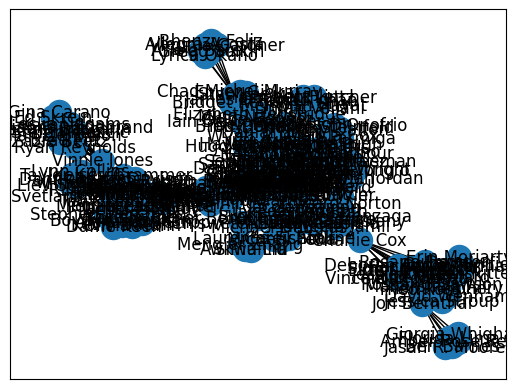

In [34]:
largest_connected_component = list(sorted(connected_components,reverse=True,key=len)[0])
print('Number of actors in largest connected components : ',len(largest_connected_component))
sub_graph = B.subgraph(largest_connected_component).copy()
nx.draw_networkx(sub_graph)

In [36]:
nx.write_gexf(sub_graph,'MCU_actors_largest_component.gexf')

In [37]:
edge_betweenness_centrality = nx.edge_betweenness_centrality(sub_graph)
edge_betweenness_centrality = sorted(list(edge_betweenness_centrality.items()),key=lambda x : x[1],reverse=True)
edge_betweenness_centrality


[(('Benedict Cumberbatch', 'Patrick Stewart'), 0.14523183675914456),
 (('Charlie Cox', 'Benedict Cumberbatch'), 0.10314898009590136),
 (('Vinnie Jones', 'Patrick Stewart'), 0.08962162501589103),
 (('Evan Peters', 'Paul Bettany'), 0.07534023671800846),
 (('Elisabeth Olsen', 'Patrick Stewart'), 0.07197261452094082),
 (('Benedict Wong', 'Patrick Stewart'), 0.05855120988493743),
 (('Charlie Cox', 'Jon Bernthal'), 0.05511795686861132),
 (('Charlie Cox', 'Mark Ruffalo'), 0.04625624711603117),
 (('Samuel L. Jackson', 'Stan Lee'), 0.04619688292388531),
 (('Charlie Cox', 'Jon Favreau'), 0.03953954144788828),
 (('Hugh Jackman', 'Patrick Stewart'), 0.03891313322658156),
 (('Rachel Taylor', 'Charlie Cox'), 0.034195935136707344),
 (('Charlie Cox', 'Tom Holland'), 0.03379894219657242),
 (('Finn Jones', 'Charlie Cox'), 0.02989474258289699),
 (('Rosario Dawson', 'Charlie Cox'), 0.027246945898778362),
 (('Charlie Cox', 'Jessica Henwick'), 0.024462805410122114),
 (('Evan Peters', 'Hugh Jackman'), 0.0224

In [38]:
from networkx.algorithms import community

comp = community.girvan_newman(sub_graph)
communities = tuple(c for c in next(comp))
print('Communities detected : ',len(communities),end='\n\n')
for i in communities:
    print(i,end='\n\n')

Communities detected :  2

{'Simu Liu', 'Elisabeth Olsen', 'Tim Roth', 'Emily VanCamp', 'Chloe Bennet', 'Ben Kingsley', 'Elizabeth Henstridge', 'Natalie Portman', 'Rachel Weisz', 'MIchel B. Jordan', 'Finn Jones', 'Mahershala Ali', 'Chiswetel Ejiofor', 'Edward Norton', 'Tatiana Maslany', 'Danial Bruhl', 'Vin Diesel', 'Colby Minifie', 'Jake Gyllenhaal', 'Zoe Saldana', 'Randall Park', 'Samuel L. Jackson', 'Kat Dennings', 'Hugo Weaving', 'Kathryn Hahn', 'Liv Tyler', 'Sophia Di Martino', 'Letitia Wright', 'Rachel Taylor', 'Idris Elba', 'Alaqua Cox ', 'Hailee Steinfeld', 'Clark Gregg', 'Virginia Gardner', 'Laurence Fishburne', 'Danniel Bruhl', 'Rossario Dawson', 'Erin Moriarty', 'Vera Farmiga', 'Micheal Pena', 'Taika Waititi', 'Sebastian Stan', 'Michael Douglas', 'Jonathan Majors', 'Giorgia Whigham', 'William Hurt', 'Dave Bautista', 'Xochiti Gomez', 'Elizabeth Olsen', 'Hayley Atwell', 'David Wenham', 'Mickey Rourke', 'Chris Evans', 'Jeff Goldblum', 'Corey Stall', 'Chris Hemsworth', 'Ariela B